In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv(r'C:\Users\rsrcy\OneDrive\Desktop\ChayanPersonal\VSC\DA with Python\Python_JobPosting_Project\data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

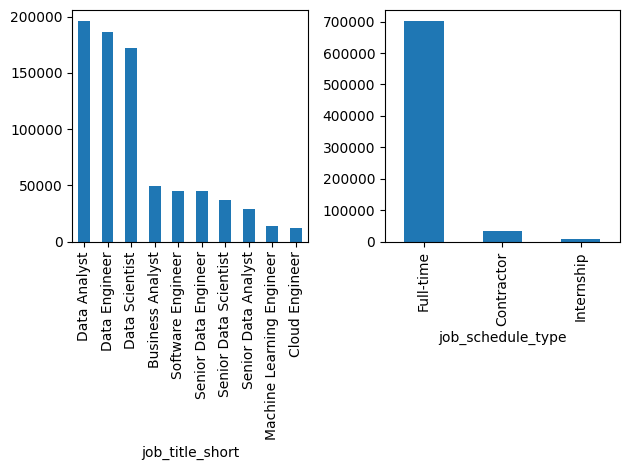

In [4]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
fig.tight_layout()
plt.show()

In [5]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_counts = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_counts = skill_counts.reset_index(name='skill_count')
df_skill_counts.sort_values(by='skill_count', ascending=False, inplace=True)

df_skill_counts

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


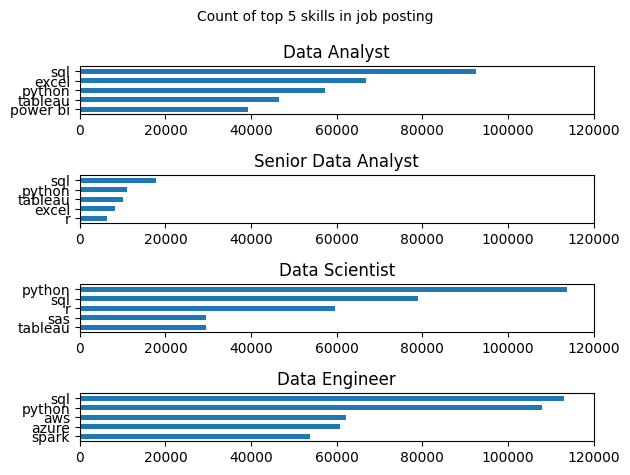

In [6]:
job_titles = ['Data Analyst', 'Senior Data Analyst', 'Data Scientist', 'Data Engineer']

fig, ax = plt.subplots(4,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_counts[df_skill_counts['job_title_short']==job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
    
fig.suptitle('Count of top 5 skills in job posting', fontsize=10)
fig.tight_layout()

Text(0, 0.5, '')

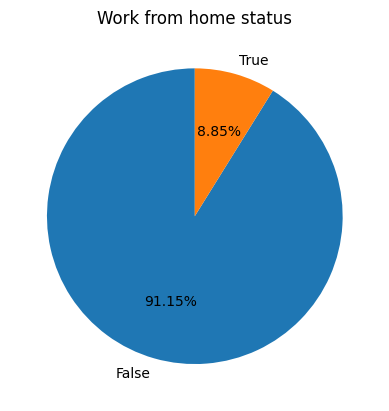

In [7]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90, autopct='%1.2f%%')
plt.title('Work from home status')
plt.ylabel('')

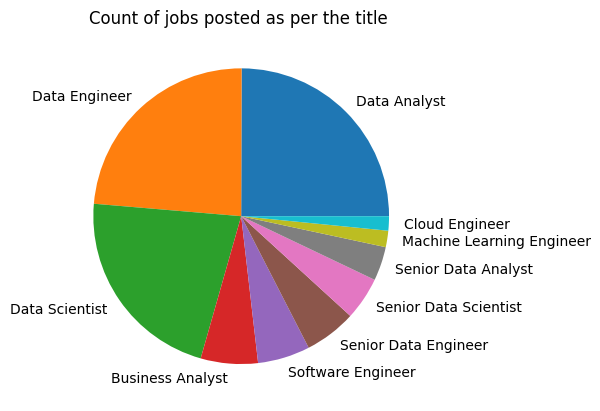

In [8]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Count of jobs posted as per the title ')
plt.ylabel('')
plt.show()

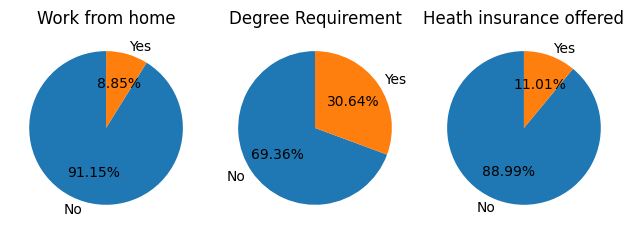

In [9]:
fig, ax = plt.subplots(1,3)

dict_colm={
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Heath insurance offered' 
}


for i,(column,title) in enumerate(dict_colm.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.2f%%', labels=['No', 'Yes'])
    ax[i].set_title(title)


fig.tight_layout()
plt.show()

In [10]:
df_scatter = df[df['job_title_short']=='Data Analyst']

df_exploded = df_scatter.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_sal = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,skill_count,median_sal
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


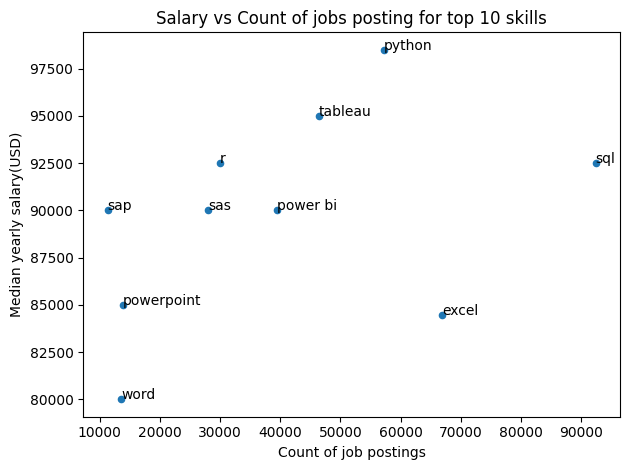

In [11]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_sal')
plt.xlabel('Count of job postings')
plt.ylabel('Median yearly salary(USD)')
plt.title('Salary vs Count of jobs posting for top 10 skills')
plt.tight_layout()

for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_sal'].iloc[i], txt)

plt.show()

In [13]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

# Creating months num column
df_DA['job_posted_month_num'] = df_DA['job_posted_date'].dt.month

# Exploding skills and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)

# Sorting the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot =  df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Setting months name
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_mon'] = df_DA_pivot['job_posted_month_num'].apply(lambda x : pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_mon')
df_DA_pivot = df_DA_pivot.drop('job_posted_month_num', axis=1)

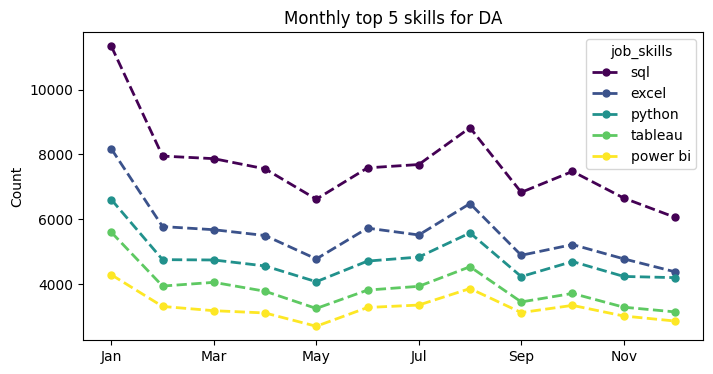

In [14]:
# Top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=2,
    linestyle='--',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(8,4)
)

plt.title('Monthly top 5 skills for DA')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [15]:
df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_sal = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

In [17]:
skill_stats

,skill_count,median_sal
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


[Text(92428, 92500.0, 'sql'), Text(66860, 84479.0, 'excel'), Text(57190, 98500.0, 'python'), Text(46455, 95000.0, 'tableau'), Text(39380, 90000.0, 'power bi'), Text(29996, 92527.5, 'r'), Text(27998, 90000.0, 'sas'), Text(13822, 85000.0, 'powerpoint'), Text(13562, 80000.0, 'word'), Text(11280, 90000.0, 'sap'), Text(10913, 100000.0, 'azure'), Text(10387, 95000.0, 'oracle'), Text(9047, 100500.0, 'aws'), Text(8288, 92150.0, 'sql server'), Text(7905, 90000.0, 'go'), Text(7259, 94450.0, 'flow'), Text(6841, 90000.0, 'vba'), Text(6259, 104000.0, 'looker'), Text(6178, 110240.109375, 'snowflake'), Text(5681, 100000.0, 'qlik')]


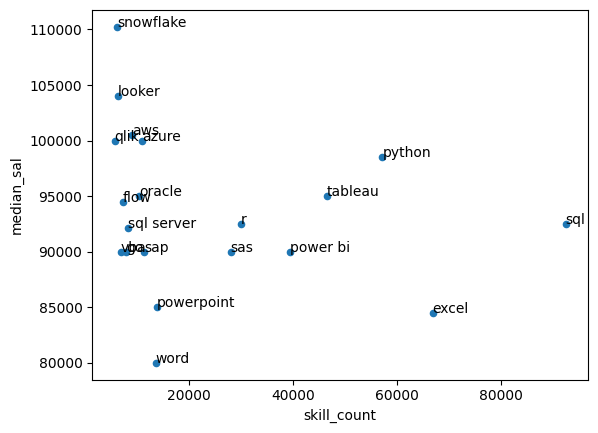

In [16]:
from adjustText import adjust_text  # Correct import

skill_stats.plot(kind='scatter', x='skill_count', y='median_sal')

texts=[]
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_sal'].iloc[i], txt))  

print(texts)
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

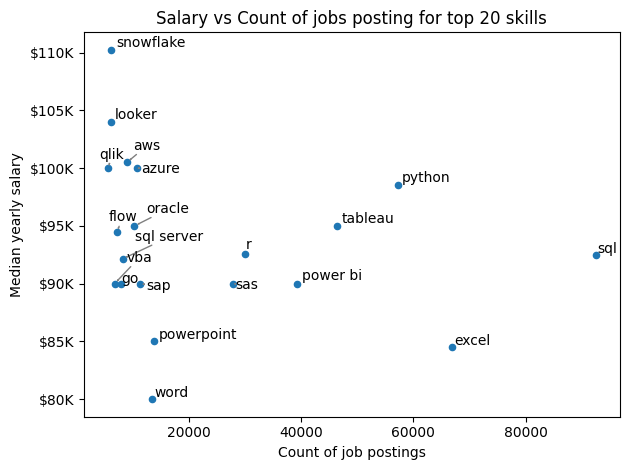

In [ ]:
from adjustText import adjust_text  # Correct import

skill_stats.plot(kind='scatter', x='skill_count', y='median_sal')

texts=[]
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_sal'].iloc[i], txt))  

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

plt.xlabel('Count of job postings')
plt.ylabel('Median yearly salary')
plt.title('Salary vs Count of jobs posting for top 20 skills')
plt.tight_layout()
plt.show()

In [ ]:
# For India region
df_DA_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short']=='Data Analyst')].copy()

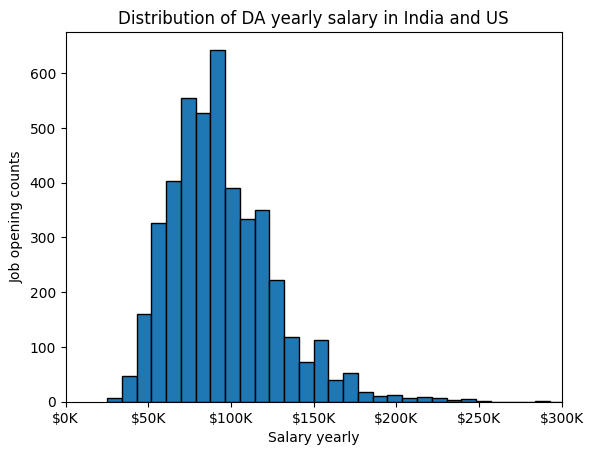

In [ ]:
df_DA_Ind_US['salary_year_avg'].plot(kind='hist', bins=70, edgecolor='black')
plt.xlim(0,300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.title('Distribution of DA yearly salary in India and US')
plt.xlabel('Salary yearly')
plt.ylabel('Job opening counts')
plt.show()

In [ ]:
# Droping NaN value
df_DA_Ind_US = df_DA_Ind_US.dropna(subset=['salary_year_avg'])

C:\Users\rsrcy\AppData\Local\Temp\ipykernel_21688\3749765840.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


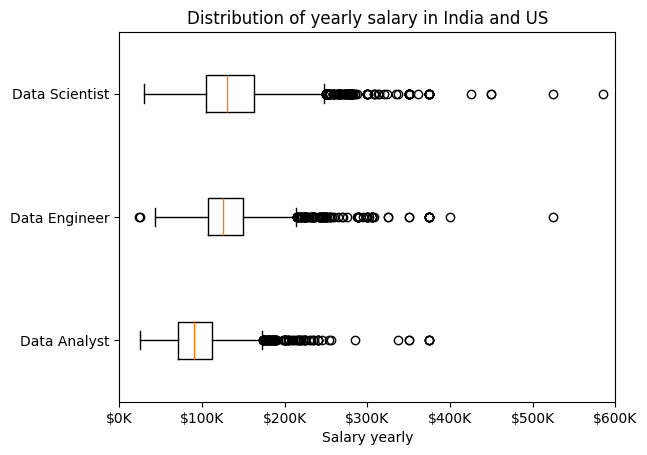

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short'].isin(job_titles))].copy()
df_Ind_US = df_Ind_US.dropna(subset=['salary_year_avg'])

job_list = [df_Ind_US[df_Ind_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False) 
plt.title('Distribution of yearly salary in India and US')
plt.xlabel('Salary yearly')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [ ]:
df_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short'].isin(job_titles))].copy()
df_Ind_US = df_Ind_US.dropna(subset=['salary_year_avg'])
df_Ind_US = df_Ind_US.explode('job_skills')

df_Ind_US_group = df_Ind_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).round(0)

df_top_pay = df_Ind_US_group.sort_values(by='median', ascending=False).head(10)
df_top_skill = df_Ind_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

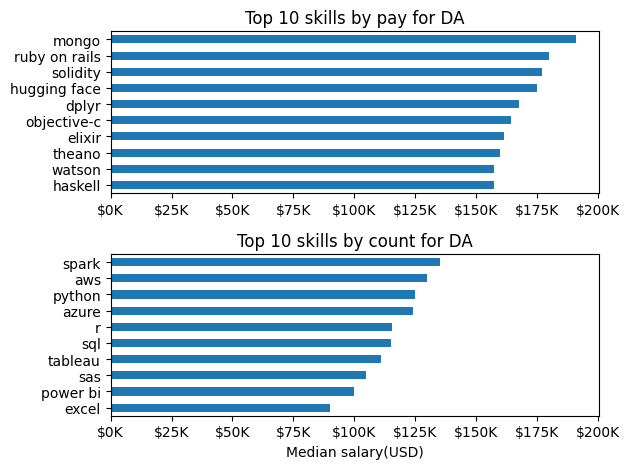

In [ ]:
fig, ax = plt.subplots(2,1)

df_top_pay[::-1].plot(kind='barh', y='median',ax=ax[0], legend=False) #ax[0].invert_yaxis
ax[0].set_title('Top 10 skills by pay for DA')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

df_top_skill[::-1].plot(kind='barh', y='median' ,ax=ax[1], legend=False) #ax[1].invert_yaxis
ax[1].set_title('Top 10 skills by count for DA')
ax[1].set_xlabel('Median salary(USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()